### 问题一：收集数据并分析中国主要行业之间的相互影响，包括正向促进和负向制约对经济发展的作用

#### 导入numpy、pandas、matplotlib、seaborn的模块

In [111]:
# 导入相关模块
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 防止绘图中文乱码
mpl.rcParams['font.family'] = 'SimHei'  # 使用黑体
mpl.rcParams['axes.unicode_minus'] = False  # 正确显示负号
# 移除SettingWithCopyWarning警告
pd.options.mode.chained_assignment = None

#### 导入对应的各个产业数据

In [112]:
# 导入初始相关数据

df=pd.read_excel('../../data/近十年各行业生产总值数据表.xlsx',sheet_name='Sheet1')
df


,年份,国民总收入,国内生产总值,第一产业,第二产业,第三产业,农林牧渔业,工业,建筑业,批发和零售业,交通运输、仓储和邮政业,住宿和餐饮业,金融业,房地产业,其他,人均国民总收入 (元),人均国内生产总值 (元)
0,2014,644380.2,643563.1,55626.3,277282.8,310654.0,57472.2,233197.4,45401.7,63170.4,28534.4,11228.7,46853.4,38086.4,119618.5,46971,46912
1,2015,685571.2,688858.2,57774.6,281338.9,349744.7,59852.6,234968.9,47761.3,67719.6,30519.5,12306.1,56299.8,42573.8,136856.5,49684,49922
2,2016,742694.1,746395.1,60139.2,295427.8,390828.1,62451.0,245406.4,51498.9,73724.5,33028.7,13607.8,59964.0,49969.4,156744.3,53516,53783
3,2017,830945.7,832035.9,62099.5,331580.5,438355.9,64660.0,275119.3,57905.6,81156.6,37121.9,15056.0,64844.3,57086.0,179086.3,59514,59592
4,2018,915243.5,919281.1,64745.2,364835.2,489700.8,67558.7,301089.3,65493.0,88903.7,40337.2,16520.6,70610.3,64623.0,204145.2,65246,65534
5,2019,983751.2,986515.2,70473.6,380670.6,535371.0,73576.9,311858.7,70648.1,95650.9,42466.3,17903.1,76250.6,70444.8,227715.8,69881,70078
6,2020,1005451.3,1013567.0,78030.9,383562.4,551973.7,81396.5,312902.9,72444.7,96086.1,40582.9,15285.4,83617.7,73425.3,237825.3,71253,71828
7,2021,1141230.8,1149237.0,83216.5,451544.1,614476.4,86994.8,374545.6,78741.2,110147.0,48423.9,18026.9,90308.7,77215.9,264833.0,80803,81370
8,2022,1194401.4,1204724.0,88207.0,473789.9,642727.1,92576.8,395043.7,80766.0,116294.1,51076.9,17755.0,93285.3,73766.1,284160.2,84579,85310
9,2023,1249990.6,1260582.1,89755.2,482588.5,688238.4,94462.6,399103.1,85691.1,123072.4,57819.8,21023.6,100676.6,73722.7,305010.2,88607,89358


In [113]:
# 获取列标题信息
df.columns

Index(['年份', '国民总收入', '国内生产总值', '第一产业', '第二产业', '第三产业', '农林牧渔业', '工业', '建筑业',
       '批发和零售业', '交通运输、仓储和邮政业', '住宿和餐饮业', '金融业', '房地产业', '其他', '人均国民总收入 (元)',
       '人均国内生产总值 (元)'],
      dtype='object')

In [114]:
# 选择特定的列来创建一个新的DataFrame
df1 = df[['国内生产总值', '农林牧渔业', '工业', '建筑业', '批发和零售业', '交通运输、仓储和邮政业', '住宿和餐饮业', '金融业', '房地产业', '其他']]
df2 = df[['国内生产总值', '农林牧渔业', '工业', '建筑业', '批发和零售业', '交通运输、仓储和邮政业', '住宿和餐饮业', '金融业', '房地产业', '其他']]
# df1.head()

# 中英文列标题对照
# 绘图中英对照表
industry_names1 = {
    '国内生产总值': 'GDP',
    '农林牧渔业': 'Farming, Forestry,\n Livestock and Fishing',
    '工业': 'Industry',
    '建筑业': 'Construction',
    '批发和零售业': 'Wholesale and\nRetail Trade',
    '交通运输、仓储和邮政业': 'Transportation, Warehous-\ning, and Postal Services',
    '住宿和餐饮业': 'Accommodation and\nCatering',
    '金融业': 'Finance',
    '房地产业': 'Real Estate',
    '其他': 'Others'
}
# 分析中英对照表
industry_names2 = {
    '国内生产总值': 'GDP',
    '农林牧渔业': 'Farming_Forestry_Livestock_and_Fishing',
    '工业': 'Industry',
    '建筑业': 'Construction',
    '批发和零售业': 'Wholesale_and_Retail_Trade',
    '交通运输、仓储和邮政业': 'Transportation_Warehousing_and_Postal_Services',
    '住宿和餐饮业': 'Accommodation_and_Catering',
    '金融业': 'Finance',
    '房地产业': 'Real_Estate',
    '其他': 'Others'
}


# 使用映射将中文列标题转换为英文
df1.rename(columns=industry_names1, inplace=True)
df1.head()

,GDP,"Farming, Forestry,\n Livestock and Fishing",Industry,Construction,Wholesale and\nRetail Trade,"Transportation, Warehous-\ning, and Postal Services",Accommodation and\nCatering,Finance,Real Estate,Others
0,643563.1,57472.2,233197.4,45401.7,63170.4,28534.4,11228.7,46853.4,38086.4,119618.5
1,688858.2,59852.6,234968.9,47761.3,67719.6,30519.5,12306.1,56299.8,42573.8,136856.5
2,746395.1,62451.0,245406.4,51498.9,73724.5,33028.7,13607.8,59964.0,49969.4,156744.3
3,832035.9,64660.0,275119.3,57905.6,81156.6,37121.9,15056.0,64844.3,57086.0,179086.3
4,919281.1,67558.7,301089.3,65493.0,88903.7,40337.2,16520.6,70610.3,64623.0,204145.2


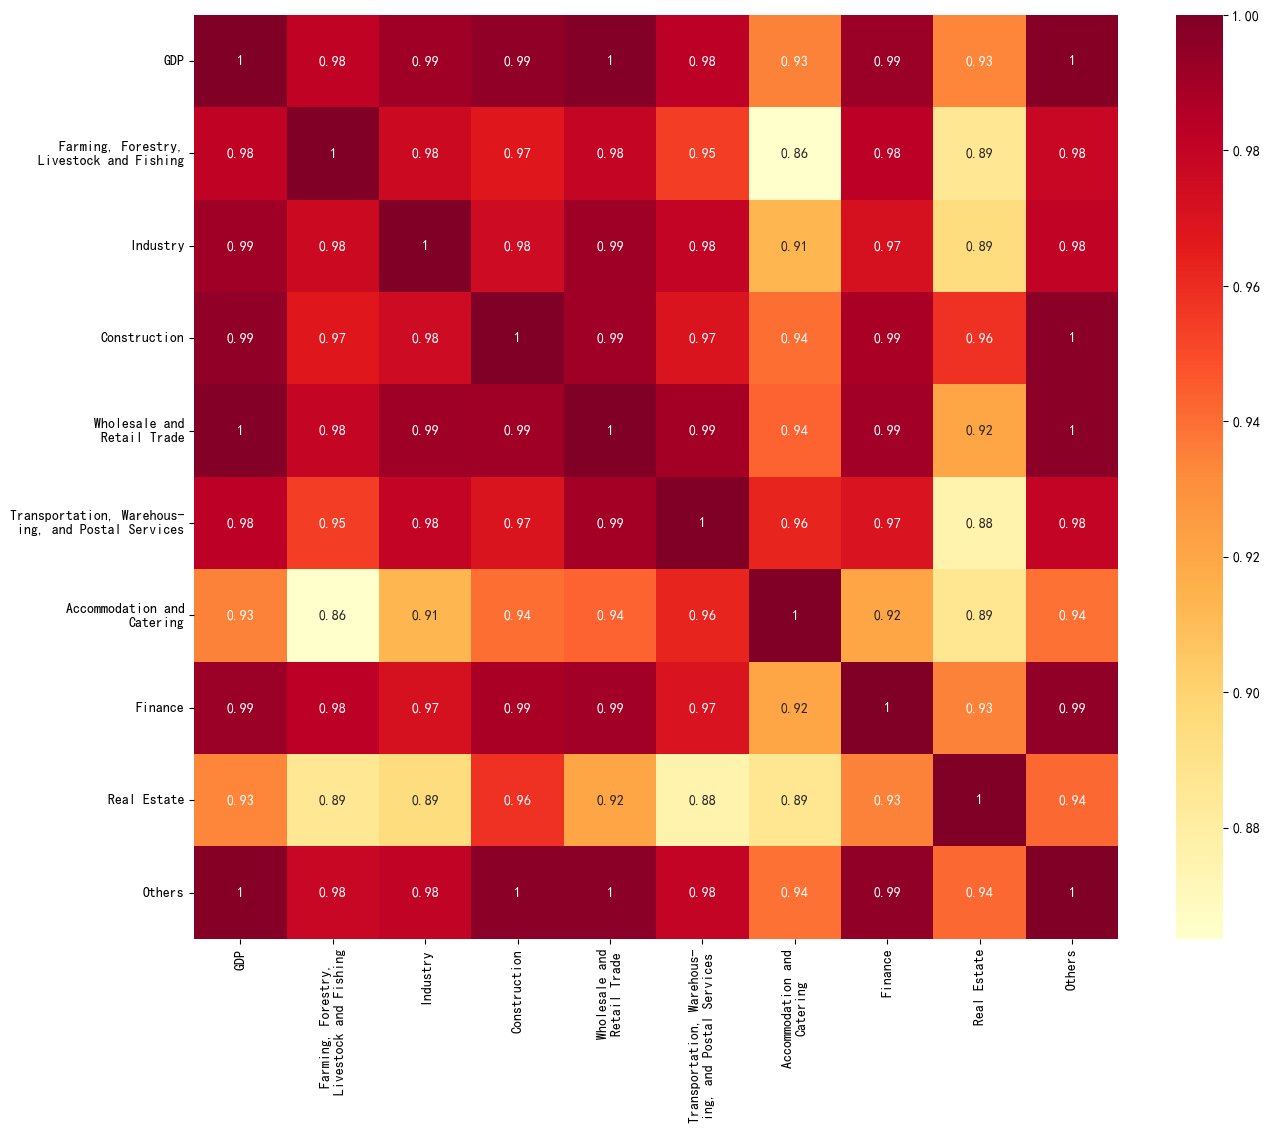

In [ ]:
# 相关性分析1：根据经济的具体数值进行相关性分析

correlation_matrix = df1.corr()
plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix, vmax=1, square=True,annot=True,cmap='YlOrRd')
# plt.title("Industry Correlation Matrix")
# 保存图像
plt.savefig("../../img/Industry_Correlation_Matrix.png", dpi=500)
plt.show()

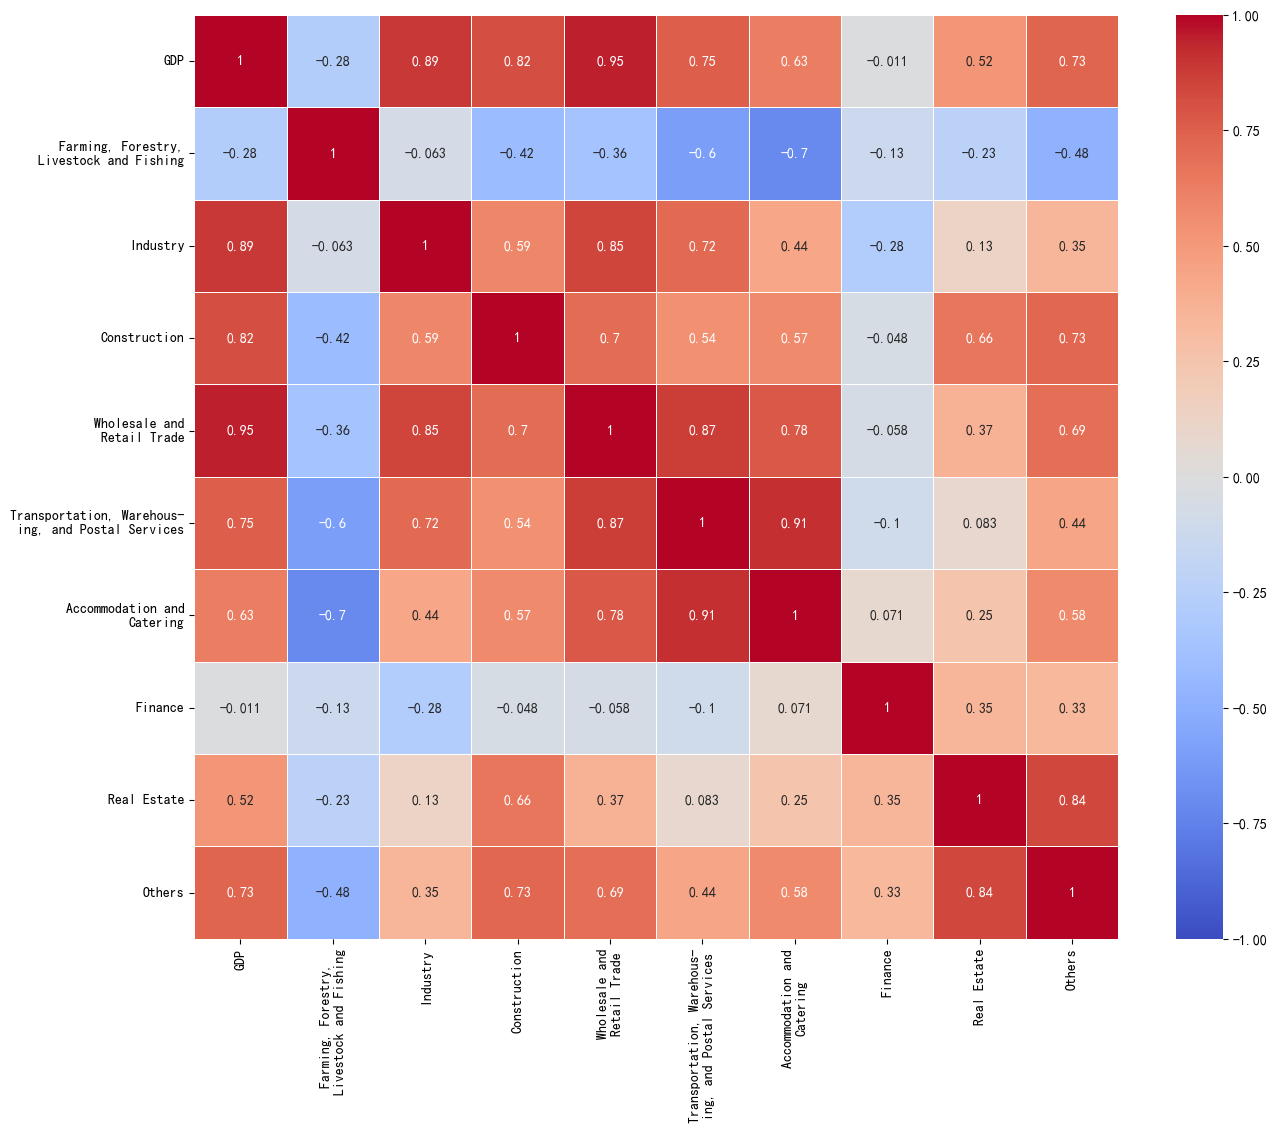

In [119]:
# 相关性分析2：根据经济的增长率数值进行相关性分析
# 计算各行业的同比增长率
df_growth = df1.pct_change().dropna()

# 计算相关矩阵
correlation_growth = df_growth.corr()

# 绘制增长率的相关性热力图
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_growth, vmax=1, vmin=-1, square=True, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title("Growth Rate Correlation Matrix")
# 保存图像
plt.savefig("../../img/Growth_Rate_Correlation_Matrix.png", dpi=500)
plt.show()


#### OLS相关分析

In [117]:
# from statsmodels.formula.api import ols

# # 将列名转换为英文
# df2.rename(columns=industry_names2, inplace=True)

# # 构建模型，以'GDP'作为因变量，其他所有行业作为自变量
# # 确保列名中的逗号和下划线被正确处理
# model = ols('GDP ~ Farming_Forestry_Livestock_and_Fishing + Industry + Construction + Wholesale_and_Retail_Trade + Transportation_Warehousing_and_Postal_Services + Accommodation_and_Catering + Finance + Real_Estate + Others', data=df2).fit()

# # 查看模型的详细结果
# print(model.summary())